https://facebook.github.io/prophet/

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet

- columns 이름을 'ds', 'y' 로 해야한다.
- prophet은 defalut가 day 이므로 month, year 기반으로 예측하려면 파라미터 수정하면 된다.

In [34]:
df = pd.read_csv('Data/Miles_Traveled.csv')

In [35]:
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
DATE                588 non-null object
TRFVOLUSM227NFWA    588 non-null float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [37]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

In [38]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
ds    588 non-null datetime64[ns]
y     588 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.3 KB


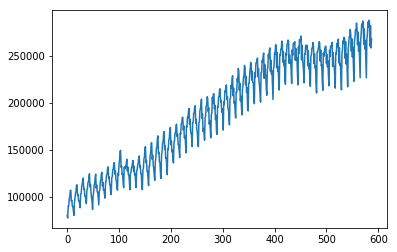

In [43]:
df['y'].plot()

In [44]:
train = df.iloc[:576]
test = df.iloc[576:]

In [45]:
m = Prophet()
m.fit(train)

future = m.make_future_dataframe(periods=12,freq='MS')
# 시간이 day가 아니라 month 이므로 freq = 'MS' (month start?)
# periods =12 는 미래 12개 predict 한다

forecast = m.predict(future)
# 이러면 forecast dataframe이 만들어진다

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
print(len(forecast))
forecast.tail()

588


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,263219.378669,274280.997937,285267.627110,263150.534372,263263.811129,16451.125033,16451.125033,16451.125033,16451.125033,16451.125033,16451.125033,0.0,0.0,0.0,279670.503702
584,2018-09-01,263357.665883,256023.778092,267344.391767,263254.774424,263429.704473,-1666.545411,-1666.545411,-1666.545411,-1666.545411,-1666.545411,-1666.545411,0.0,0.0,0.0,261691.120472
585,2018-10-01,263491.492218,262597.306610,274618.730694,263348.525047,263584.994077,5310.587893,5310.587893,5310.587893,5310.587893,5310.587893,5310.587893,0.0,0.0,0.0,268802.080112
586,2018-11-01,263629.779432,249782.292172,261094.290495,263442.963954,263740.698041,-8203.436940,-8203.436940,-8203.436940,-8203.436940,-8203.436940,-8203.436940,0.0,0.0,0.0,255426.342492
587,2018-12-01,263763.605767,251109.604172,262566.928795,263544.694456,263903.722858,-6916.514689,-6916.514689,-6916.514689,-6916.514689,-6916.514689,-6916.514689,0.0,0.0,0.0,256847.091078


In [50]:
test.tail()

,ds,y
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0
586,2018-11-01,258590.0
587,2018-12-01,268413.0


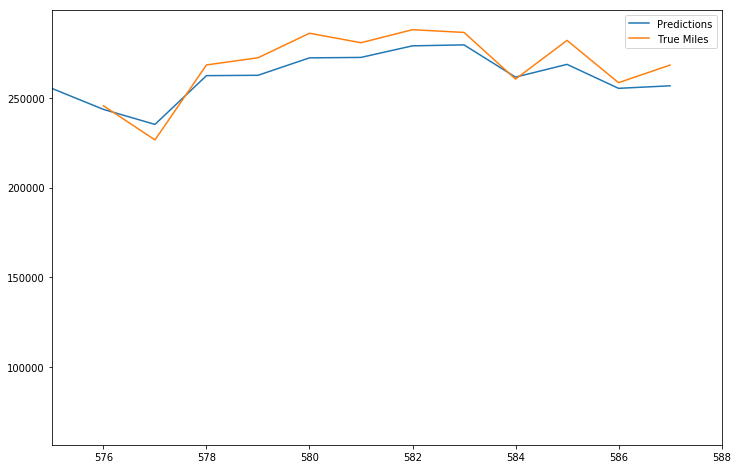

In [62]:
ax = forecast['yhat'].plot(label='Predictions',legend=True,figsize=(12,8))

test['y'].plot(label='True Miles',legend=True,
          ax=ax,
          xlim = (575,588));

In [63]:
from statsmodels.tools.eval_measures import rmse

In [64]:
predictions = forecast.iloc[-12:]['yhat']

print('rmse 값:',rmse(predictions,test['y']))
print('test 평균:',test.mean())
# 비교해보면 괜찮은 rmse 같다

rmse 값: 8750.250520830608
test 평균: y    268739.666667
dtype: float64


##  diagnostics (cross validation)

In [65]:
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

cross validation 할려면 무조건 아래와 같은 양식으로 만들어야한다

In [67]:
# Initial 5 years training period
initial = 5 * 365
initial = str(initial) + ' days'
# Fold every 5 years
period = 5 * 365
period = str(period) + ' days'
# Forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'

In [68]:
df_cv = cross_validation(m, initial=initial,
                            period = period,
                            horizon = horizon)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00
C:\anaconda\envs\tsa_course\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [69]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.087389,107107.486909,109985.446293,102445.0,1976-12-11
1,1977-02-01,102996.111525,101583.321003,104459.494302,102416.0,1976-12-11
2,1977-03-01,118973.318113,117568.992053,120442.037783,119960.0,1976-12-11
3,1977-04-01,120612.923709,119138.168925,122042.246123,121513.0,1976-12-11
4,1977-05-01,127883.031830,126389.395839,129303.851462,128884.0,1976-12-11


In [70]:
performance_metrics(df_cv).head()

,horizon,mse,rmse,mae,mape,coverage
0,52 days,2.437359e+07,4936.961190,4528.637861,0.027750,0.4
1,53 days,2.187095e+07,4676.638408,4262.628303,0.024999,0.4
2,54 days,1.842045e+07,4291.904691,3732.310696,0.020061,0.5
3,55 days,2.351247e+07,4848.965429,4271.125183,0.023241,0.4
4,57 days,2.115130e+07,4599.053997,3989.900860,0.021416,0.5


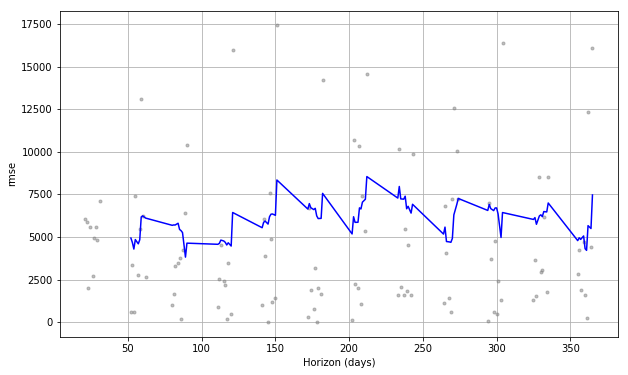

In [71]:
plot_cross_validation_metric(df_cv, metric='rmse');

## Trend change

In [72]:
df = pd.read_csv('Data/HospitalityEmployees.csv')

In [73]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

In [80]:
df.head()

,ds,y
0,1990-01-01,1064.5
1,1990-02-01,1074.5
2,1990-03-01,1090.0
3,1990-04-01,1097.4
4,1990-05-01,1108.7


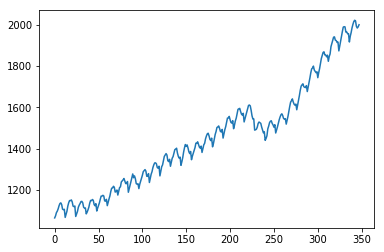

In [76]:
df['y'].plot();

In [77]:
train = df.iloc[:336]
test = df.iloc[336:]

In [78]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Automatic changepoint detection in Prophet

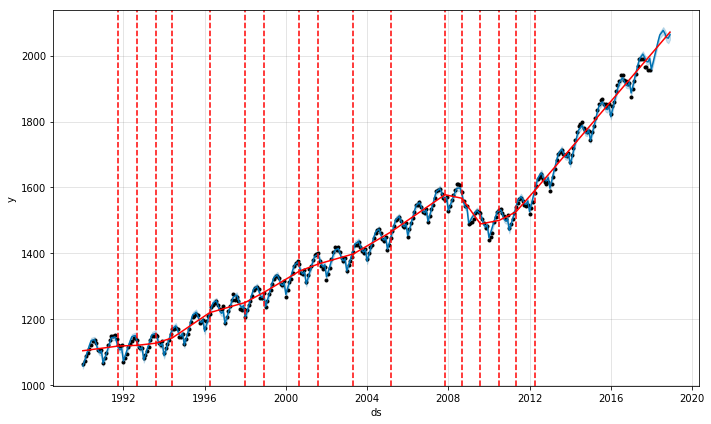

In [81]:
from fbprophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

## Changing seasonality

In [83]:
df = pd.read_csv('Data/airline_passengers.csv')

df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [84]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


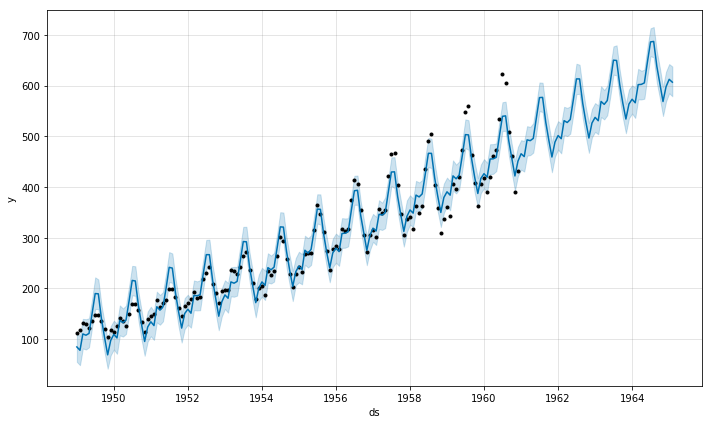

In [85]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(50, freq = 'MS')
forecast = m.predict(future)
fig = m.plot(forecast)

근데 그래프를 보면 점점 분산이 커져야한다는 것을 알 수 있다.
- seasonality가 additive가 아닌 multiplicative 로!

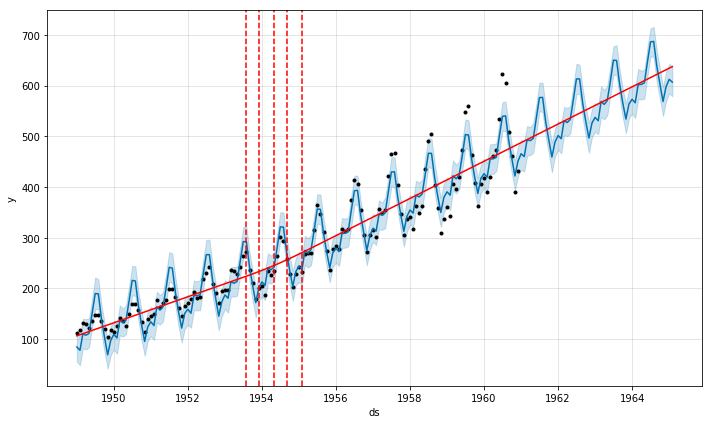

In [86]:
from fbprophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

위보다 잘 예측된 것 같다

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


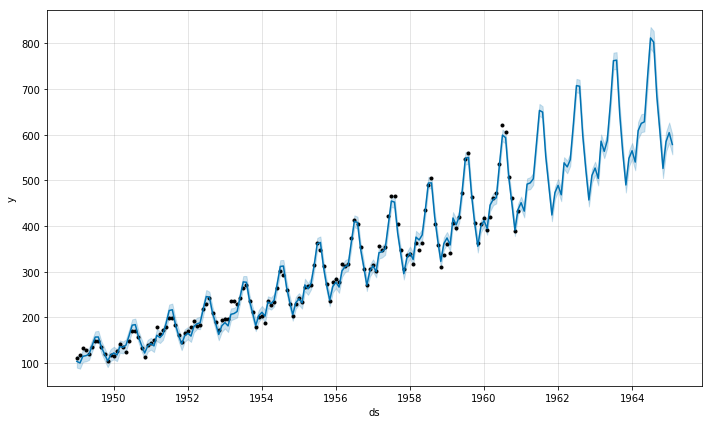

In [87]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
forecast = m.predict(future)
fig = m.plot(forecast)